<a href="https://colab.research.google.com/github/rutvi615/data_narrative/blob/main/22110227_D2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

       AS-FULL PROFESSORS  AS-ASSOCIATE PROFESSORS  AS-ASSISTANT PROFESSORS
STATE                                                                      
CA                 608.63                   469.43                   390.19
IL                 469.86                   401.40                   334.86
IN                 446.68                   374.78                   328.90
MA                 611.07                   474.33                   402.21
NC                 434.83                   377.19                   326.17
NY                 558.00                   448.96                   374.00
OH                 453.21                   398.38                   328.75
PA                 546.76                   445.48                   372.01
TX                 504.56                   412.93                   348.76
VA                 497.49                   400.26                   340.54


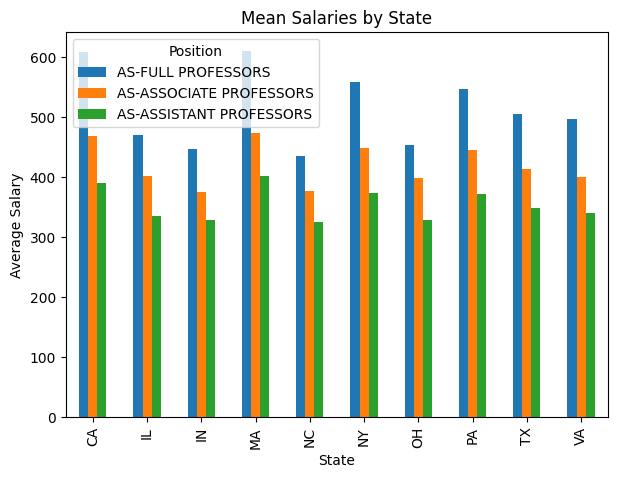

In [ ]:
4#Is there a difference in the average salaries of full, associate, and assistant professors across different states?aaup
import pandas as pd
import matplotlib.pyplot as plt

if __name__ == '__main__':
  df= pd.read_csv('/content/aaup.csv', header=0)
  df['AS-FULL PROFESSORS'] = pd.to_numeric(df['AS-FULL PROFESSORS'].replace('*', 0))
  df['AS-ASSOCIATE PROFESSORS'] = pd.to_numeric(df['AS-ASSOCIATE PROFESSORS'].replace('*',0))
  df['AS-ASSISTANT PROFESSORS'] = pd.to_numeric(df['AS-ASSISTANT PROFESSORS'].replace('*', 0))
  top = df['STATE'].value_counts().head(10)
  df = df[df['STATE'].isin(top.index)]
  grouped = df.groupby('STATE')[['AS-FULL PROFESSORS', 'AS-ASSOCIATE PROFESSORS', 'AS-ASSISTANT PROFESSORS']].mean().round(2)
  print(grouped)
  g=df[["STATE",'AS-FULL PROFESSORS', 'AS-ASSOCIATE PROFESSORS', 'AS-ASSISTANT PROFESSORS']]
  grouped.plot(kind='bar',figsize=(7,5))
  plt.title('Mean Salaries by State')
  plt.xlabel('State')
  plt.ylabel('Average Salary')
  plt.legend(title='Position')
  plt.show()

Public: 17.32
Private: 13.43


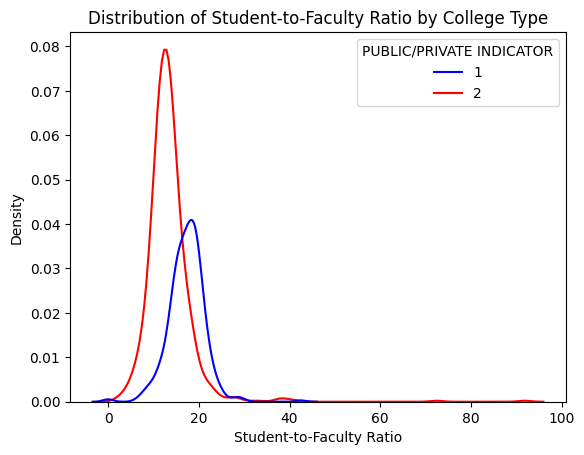

In [ ]:
#Is there a difference in the student-to-faculty ratio between private and public institutions?usnews
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import gaussian_kde

df = pd.read_csv("usnews.csv")
df["STUDENT/FACULTY RATIO"] = pd.to_numeric(df["STUDENT/FACULTY RATIO"].replace('*', 0))
colors = ["blue", "red"]
private=df[df["PUBLIC/PRIVATE INDICATOR"]==2]
public=df[df["PUBLIC/PRIVATE INDICATOR"]==1]
print("Public:",public["STUDENT/FACULTY RATIO"].mean().round(2))
print("Private:",private["STUDENT/FACULTY RATIO"].mean().round(2))


sns.set_palette(sns.color_palette(colors))
sns.kdeplot( x="STUDENT/FACULTY RATIO",hue="PUBLIC/PRIVATE INDICATOR", data=df,palette=colors)
plt.xlabel("Student-to-Faculty Ratio")
plt.title("Distribution of Student-to-Faculty Ratio by College Type")
plt.show()


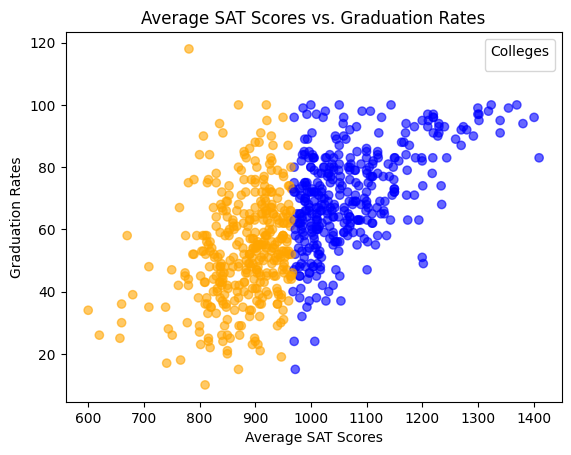

In [ ]:
#Do colleges with higher average SAT scores tend to have higher graduation rates? usnews
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv("usnews.csv")
sat_scores = pd.to_numeric(df["AVERAGE COMBINED SAT SCORE"].replace('*', ""))
grad_rates = pd.to_numeric(df["GRADUATION RATE"].replace('*', ""))
median_sat = sat_scores.mean()
df["Top 50%"] =sat_scores >= median_sat
colors = df["Top 50%"].map({True: "blue", False: "orange"})
plt.scatter(sat_scores, grad_rates, alpha=0.6, c=colors)
plt.title("Average SAT Scores vs. Graduation Rates")
plt.xlabel("Average SAT Scores")
plt.ylabel("Graduation Rates")
plt.legend(title='Colleges')
plt.show()

      FULL PROFESSORS  ASSOCIATE PROFESSORS  ASSISTANT PROFESSORS
TYPE                                                             
I              334.31                227.14                188.81
IIA             94.54                 77.43                 78.55
IIB             25.75                 24.33                 27.80
VIIB            27.00                 31.00                 33.00
      AS-FULL PROFESSORS  AS-ASSOCIATE PROFESSORS  AS-ASSISTANT PROFESSORS
TYPE                                                                      
I                 668.53                   486.76                   412.71
IIA               537.69                   436.77                   368.01
IIB               416.46                   359.70                   311.11
VIIB              415.00                   348.00                   312.00
      AC-FULL PROFESSORS  AC-ASSOCIATE PROFESSORS  AC-ASSISTANT PROFESSORS
TYPE                                                                      
I   

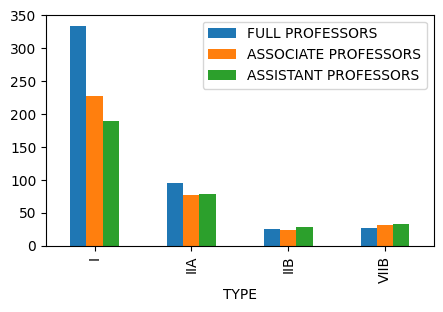

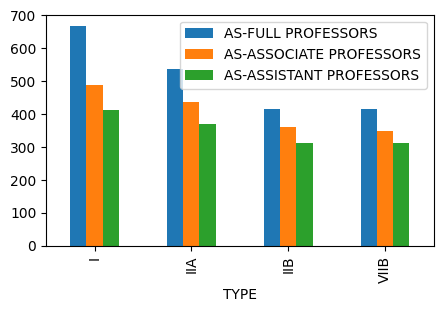

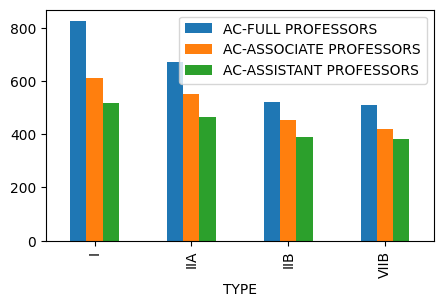

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# read in the dataset
df = pd.read_csv("aaup.csv")
df["FULL PROFESSORS"]= pd.to_numeric(df["FULL PROFESSORS"].replace('*', 0))
df["ASSISTANT PROFESSORS"]= pd.to_numeric(df["ASSISTANT PROFESSORS"].replace('*', 0))
df["ASSOCIATE PROFESSORS"]= pd.to_numeric(df["ASSOCIATE PROFESSORS"].replace('*', 0))
grouped = df.groupby('TYPE')[['FULL PROFESSORS', 'ASSOCIATE PROFESSORS', 'ASSISTANT PROFESSORS']].mean().round(2)
df["AS-FULL PROFESSORS"]= pd.to_numeric(df["AS-FULL PROFESSORS"].replace('*', 0))
df["AS-ASSISTANT PROFESSORS"]= pd.to_numeric(df["AS-ASSISTANT PROFESSORS"].replace('*', 0))
df["AS-ASSOCIATE PROFESSORS"]= pd.to_numeric(df["AS-ASSOCIATE PROFESSORS"].replace('*', 0))
grouped1= df.groupby('TYPE')[['AS-FULL PROFESSORS', 'AS-ASSOCIATE PROFESSORS', 'AS-ASSISTANT PROFESSORS']].mean().round(2)
df["AC-FULL PROFESSORS"]= pd.to_numeric(df["AC-FULL PROFESSORS"].replace('*', 0))
df["AC-ASSISTANT PROFESSORS"]= pd.to_numeric(df["AC-ASSISTANT PROFESSORS"].replace('*', 0))
df["AC-ASSOCIATE PROFESSORS"]= pd.to_numeric(df["AC-ASSOCIATE PROFESSORS"].replace('*', 0))
grouped2 = df.groupby('TYPE')[['AC-FULL PROFESSORS', 'AC-ASSOCIATE PROFESSORS', 'AC-ASSISTANT PROFESSORS']].mean().round(2)
print(grouped)
print(grouped1)
print(grouped2)
grouped.plot(kind='bar',figsize=(5,3))
grouped1.plot(kind='bar',figsize=(5,3))
grouped2.plot(kind='bar',figsize=(5,3))
 # Plot the chart
plt.show()


<ipython-input-93-132886de34a3>:14: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  totals = d.groupby("COLLEGE NAME")['FULL PROFESSORS', 'ASSOCIATE PROFESSORS', 'ASSISTANT PROFESSORS'].sum()


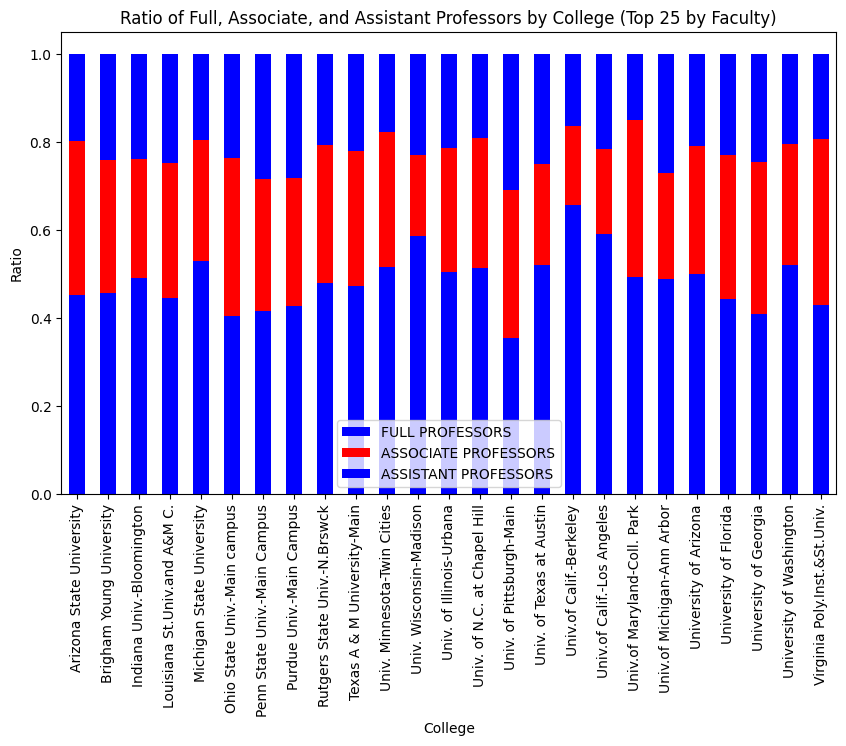

In [ ]:
#Ratio of Full, Associate, and Assistant Professors by College (Top 25 by Faculty)
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset
data = pd.read_csv("aaup.csv")
df["FULL PROFESSORS"]= pd.to_numeric(df["FULL PROFESSORS"].replace('*', 0))
df["ASSISTANT PROFESSORS"]= pd.to_numeric(df["ASSISTANT PROFESSORS"].replace('*', 0))
df["ASSOCIATE PROFESSORS"]= pd.to_numeric(df["ASSOCIATE PROFESSORS"].replace('*', 0))


top = data.sort_values("FACULTY-ALL RANKS", ascending=False).head(25)["COLLEGE NAME"].tolist()
d = data[data["COLLEGE NAME"].isin(top)]
totals = d.groupby("COLLEGE NAME")['FULL PROFESSORS', 'ASSOCIATE PROFESSORS', 'ASSISTANT PROFESSORS'].sum()
ratios = totals.apply(lambda x: x / x.sum(), axis=1)
ax = ratios.plot(kind="bar", stacked=True, figsize=(10, 6))


ax.set_title("Ratio of Full, Associate, and Assistant Professors by College (Top 25 by Faculty)")
ax.set_xlabel("College")
ax.set_ylabel("Ratio")

plt.show()



Total Number of Full Professors in all Colleges: 110407
Total Number of Associate Professors in all Colleges: 79685
Total Number of Assistant Professors in all Colleges: 84039


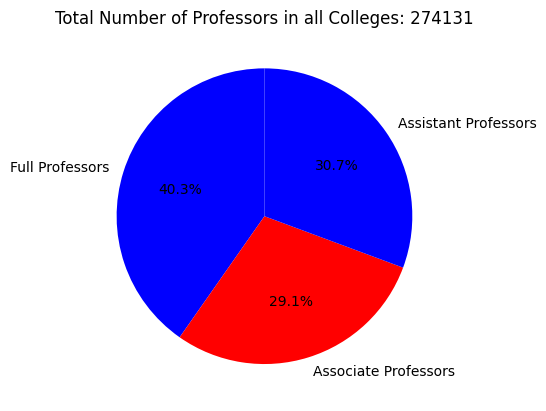

In [ ]:
#AAUP
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset
df = pd.read_csv('aaup.csv')
p1=data["FULL PROFESSORS"].sum()
p2=data["ASSISTANT PROFESSORS"].sum()
p3=data["ASSOCIATE PROFESSORS"].sum()
total=p1+p2+p3
print('Total Number of Full Professors in all Colleges: {}'.format(p1))
print('Total Number of Associate Professors in all Colleges: {}'.format(p2))
print('Total Number of Assistant Professors in all Colleges: {}'.format(p3))
labels = ['Full Professors', 'Associate Professors', 'Assistant Professors']
sizes = [p1,p2,p3]
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90)
plt.title('Total Number of Professors in all Colleges: {}'.format(total))
plt.show()


                 COLLEGE NAME  OUT-OF-STATE TUITION  NOT ENROLLED
  Birmingham-Southern College                 11660           301
          Spring Hill College                 11478           464
           Samford University                  8236           704
           Huntingdon College                  8080           393
    Alaska Pacific University                  7560            91
          Tuskegee University                  6735          1216
              Oakwood College                  6639           220
Auburn University-Main Campus                  6300          3721
         University of Mobile                  6150            62
               Judson College                  5780            91
                     COLLEGE NAME  OUT-OF-STATE TUITION  NOT ENROLLED
            Livingston University                  1740           513
    Jacksonville State University                  2610           526
    Troy State University at Troy                  2883         

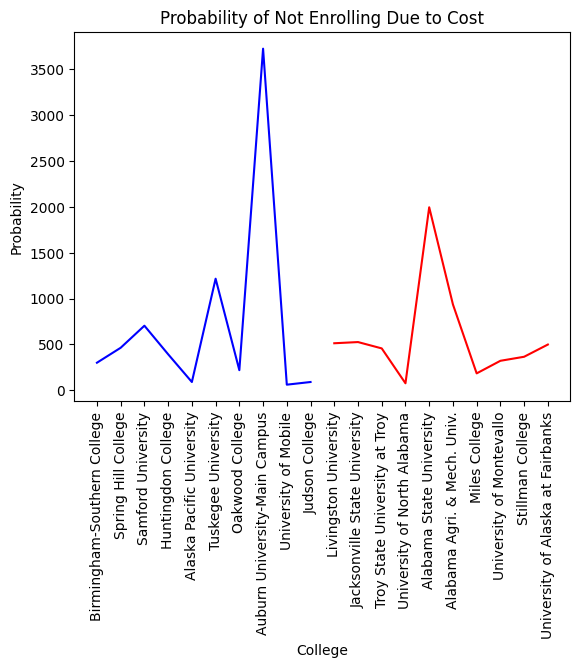

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('usnews.csv')
df=df.head(25)
df["OUT-OF-STATE TUITION"]= pd.to_numeric(df["OUT-OF-STATE TUITION"].replace('*', 0))
df["APPLICATIONS ACCEPTED"]= pd.to_numeric(df["APPLICATIONS ACCEPTED"].replace('*', 0))
df["NEW STUDENTS ENROLLED"]= pd.to_numeric(df["NEW STUDENTS ENROLLED"].replace('*', 0))
df['NOT ENROLLED'] = df['APPLICATIONS ACCEPTED']- df['NEW STUDENTS ENROLLED']

t10 = df.nlargest(10, 'OUT-OF-STATE TUITION')
b10 = df.nsmallest(10, 'OUT-OF-STATE TUITION')

columns = ['COLLEGE NAME', 'OUT-OF-STATE TUITION', 'NOT ENROLLED']

print(t10[columns].to_string(index=False))
print(b10[columns].to_string(index=False))
df['NOT ENROLLED'] = df['APPLICATIONS ACCEPTED']- df['NEW STUDENTS ENROLLED']

plt.plot(t10['COLLEGE NAME'],t10['NOT ENROLLED'])
plt.plot(b10['COLLEGE NAME'],b10['NOT ENROLLED'])
plt.xticks(rotation=90)
plt.xlabel('College')
plt.ylabel('Probability')
plt.title('Probability of Not Enrolling Due to Cost')
plt.show()


962     6250
1233    5270
1262    4760
159     4541
435     4490
281     4350
819     4150
908     4110
783     4000
155     3960
Name: 2500, dtype: object
[3241, 3692, 3863, 1445, 2121, 1665, 2808, 3142, 2710, 1434]
+---+-----------------------+------+------------+
|   |     College_name      | Code | Board_cost |
+---+-----------------------+------+------------+
| 0 |    Cabrini College    | 3241 |    6250    |
| 1 |  Norwich University   | 3692 |    5270    |
| 2 | Marquette University  | 3863 |    4760    |
| 3 | Georgetown University | 1445 |    4541    |
| 4 |    Babson College     | 2121 |    4490    |
| 5 |   Columbia College    | 1665 |    4350    |
| 6 |    Daemen College     | 2808 |    4150    |
| 7 |  Wilmington College   | 3142 |    4110    |
| 8 |     Cooper Union      | 2710 |    4000    |
| 9 |  American University  | 1434 |    3960    |
+---+-----------------------+------+------------+


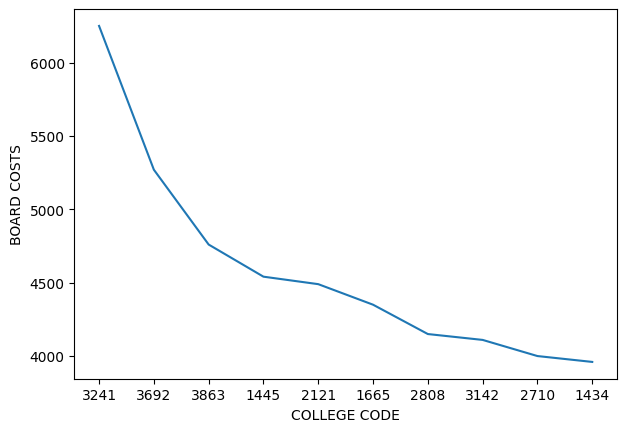

In [ ]:
#BOARD COST us
import pandas as pds
import matplotlib.pyplot as plt
from tabulate import tabulate
df=pds.read_csv('/content/usnews.data.txt')
ax=df.iloc[:,25]
new_ax=ax.replace('*','0')
#print(new_ax)
for i in range(1301):
  new_ax.iloc[i]=int(new_ax.iloc[i])
#print(type(new_ax.iloc[7]))
bn=new_ax.sort_values(ascending=False).head(10)
print(bn)
DICT1={'College_name':[df.iloc[962,1],df.iloc[1233,1],df.iloc[1262,1],df.iloc[159,1],df.iloc[435,1],df.iloc[281,1],df.iloc[819,1],df.iloc[908,1],df.iloc[783,1],df.iloc[155,1]],
       'Code':[df.iloc[962,0],df.iloc[1233,0],df.iloc[1262,0],df.iloc[159,0],df.iloc[435,0],df.iloc[281,0],df.iloc[819,0],df.iloc[908,0],df.iloc[783,0],df.iloc[155,0]],
      'Board_cost':['6250','5270','4760','4541','4490','4350','4150','4110','4000','3960']}
College_name=[df.iloc[962,1],df.iloc[1233,1],df.iloc[1262,1],df.iloc[159,1],df.iloc[435,1],df.iloc[281,1],df.iloc[819,1],df.iloc[908,1],df.iloc[783,1],df.iloc[155,1]]
Code=[df.iloc[962,0],df.iloc[1233,0],df.iloc[1262,0],df.iloc[159,0],df.iloc[435,0],df.iloc[281,0],df.iloc[819,0],df.iloc[908,0],df.iloc[783,0],df.iloc[155,0]]
print(Code)
Board_cost=[6250,5270,4760,4541,4490,4350,4150,4110,4000,3960]
College_Code=[str(i) for i in Code]
af=pds.DataFrame(DICT1)
plt.figure().set_figwidth(7)
plt.plot(College_Code,Board_cost)
plt.xlabel('COLLEGE CODE')
plt.ylabel('BOARD COSTS')
plt.show
print(tabulate(af,headers = 'keys', tablefmt = 'pretty'))

352     0.0
934     0.0
49      2.3
1291    2.5
872     2.9
494     3.3
612     3.9
683     4.3
606     4.6
714     4.7
359     4.9
208     5.0
Name: 11.9, dtype: object
+---+---------------------------------+-------+--------+
|   |          College_name           | Code  | _ratio |
+---+---------------------------------+-------+--------+
| 0 |        Prescott College         | 29022 |  2.3   |
| 1 |    University of Charleston     | 3818  |  2.5   |
| 2 | Case Western Reserve University | 3024  |  2.9   |
| 3 |    Johns Hopkins University     | 2077  |  3.3   |
| 4 |      Washington University      | 2520  |  3.9   |
| 5 |     Wake Forest University      | 2978  |  4.3   |
| 6 |     Saint Louis University      | 2506  |  4.6   |
| 7 |        Dartmouth College        | 2573  |  4.7   |
| 8 |      Saint Meinrad College      | 1837  |  4.9   |
| 9 |        Emory University         | 1564  |  5.0   |
+---+---------------------------------+-------+--------+


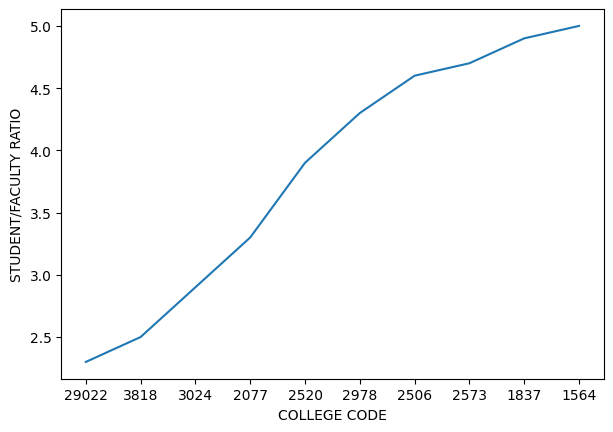

In [ ]:
#STUDENT FACULTY RATIO us
import pandas as pds
import matplotlib.pyplot as plt
from tabulate import tabulate
df=pds.read_csv('/content/usnews.data.txt')
ax=df.iloc[:,31]
new_ax=ax.replace('*','0')
#print(new_ax)
for i in range(1301):
  new_ax.iloc[i]=float(new_ax.iloc[i])
#print(type(new_ax.iloc[7]))
bn=new_ax.sort_values(ascending=True).head(12)
print(bn)
DICT1={'College_name':[df.iloc[49,1],df.iloc[1291,1],df.iloc[872,1],df.iloc[494,1],df.iloc[612,1],df.iloc[683,1],df.iloc[606,1],df.iloc[714,1],df.iloc[359,1],df.iloc[208,1]],
       'Code':[df.iloc[49,0],df.iloc[1291,0],df.iloc[872,0],df.iloc[494,0],df.iloc[612,0],df.iloc[683,0],df.iloc[606,0],df.iloc[714,0],df.iloc[359,0],df.iloc[208,0]],
      '_ratio':['2.3','2.5','2.9','3.3','3.9','4.3','4.6','4.7','4.9','5.0']}
College_name=[df.iloc[49,1],df.iloc[1291,1],df.iloc[872,1],df.iloc[494,1],df.iloc[612,1],df.iloc[683,1],df.iloc[606,1],df.iloc[714,1],df.iloc[359,1],df.iloc[208,1]]
Code=[df.iloc[49,0],df.iloc[1291,0],df.iloc[872,0],df.iloc[494,0],df.iloc[612,0],df.iloc[683,0],df.iloc[606,0],df.iloc[714,0],df.iloc[359,0],df.iloc[208,0]]
_ratio=[2.3,2.5,2.9,3.3,3.9,4.3,4.6,4.7,4.9,5.0]
College_Code=[str(i) for i in Code]
af=pds.DataFrame(DICT1)
plt.figure().set_figwidth(7)
plt.plot(College_Code,_ratio)
plt.xlabel('COLLEGE CODE')
plt.ylabel('STUDENT/FACULTY RATIO')
plt.grid
plt.show
plt.grid
print(tabulate(af,headers = 'keys', tablefmt = 'pretty'))

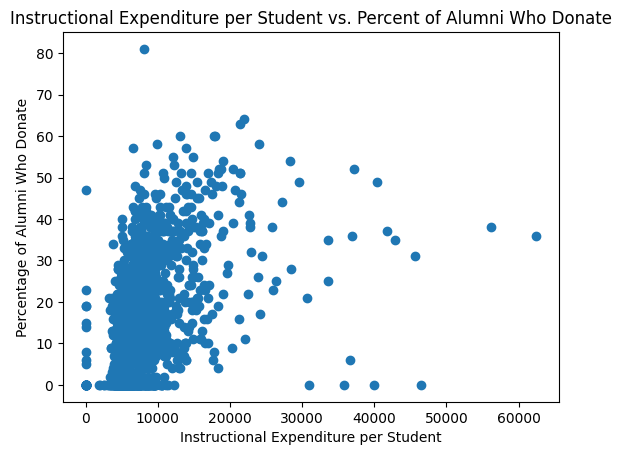

In [ ]:
#does the percentage of alumni who donate to the college impact the amount of instructional expenditure per student?
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('/content/usnews.csv')
df=df.replace("*",0)
df['%ALUMNI WHO DONATE']=df['%ALUMNI WHO DONATE'].astype(float)
df["INSTRUCTIONAL EXPENDITURE PER STUDENT"]=df['INSTRUCTIONAL EXPENDITURE PER STUDENT'].astype(float)
alumni_donate = df['%ALUMNI WHO DONATE']
instructional_expense = df['INSTRUCTIONAL EXPENDITURE PER STUDENT']

plt.scatter(instructional_expense, alumni_donate)
plt.title('Instructional Expenditure per Student vs. Percent of Alumni Who Donate')
plt.xlabel('Instructional Expenditure per Student')
plt.ylabel('Percentage of Alumni Who Donate')
plt.show()

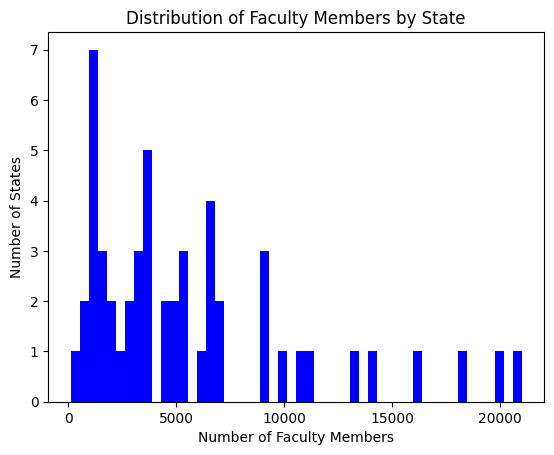

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
df = pd.read_csv('aaup.csv')
fac = df.groupby('STATE')['FACULTY-ALL RANKS'].sum()

plt.hist(fac, bins=50)
plt.title('Distribution of Faculty Members by State')
plt.xlabel('Number of Faculty Members')
plt.ylabel('Number of States')
plt.show()